### Bag of Words (BoW) - Concept and Drawbacks

**Concept:**

- **Bag of Words (BoW)** is a simple and widely used text representation model in Natural Language Processing (NLP). In this model, a text (such as a document or sentence) is represented as a collection of words without considering grammar or word order.
  
- **Process:**
  1. **Tokenization**: Break the text into individual words (tokens).
  2. **Vocabulary Creation**: Build a vocabulary of all unique words from the entire dataset.
  3. **Vectorization**: Represent each text (document) as a vector where each element corresponds to a word in the vocabulary. The value in the vector represents the word frequency (or presence/absence) in the document.

**Example:**

Text 1: "I love programming"  
Text 2: "Programming is fun"

Vocabulary: ["I", "love", "programming", "is", "fun"]

BoW Vectors:
- Text 1: [1, 1, 1, 0, 0]
- Text 2: [0, 0, 1, 1, 1]

---

**Example 2:**
Text 1: "I love programming"
Text 2: "Programming is fun fun"

BoW Vectors:
- Text 1: [1, 1, 1, 0, 0]
- Text 2: [0, 0, 1, 1, 2]

**Drawbacks:**

1. **Ignoring Word Order**: BoW ignores the order and structure of words, leading to a loss of context or meaning.
2. **High Dimensionality**: The vocabulary size can be large, creating sparse vectors, especially for large datasets.
3. **Context Insensitivity**: Words with multiple meanings (polysemy) or context-dependent meanings are treated the same, leading to poor representation of semantic meaning.
4. **Vocabulary Explosion**: Handling synonyms and rare words can increase the model's complexity and reduce its effectiveness.

---

### Summary

BoW is a simple method for converting text to numerical vectors, but it has limitations regarding semantic understanding and efficiency.


In [27]:
import pandas as pd
text1 = "I love programming"
text2 = "the programming is fun fun"

# Step 1: Create a DataFrame
df = pd.DataFrame({
    'Text': [text1, text2],
    'Label': ['Text 1', 'Text 2']
})

# Display the DataFrame
print(df)

                         Text   Label
0          I love programming  Text 1
1  the programming is fun fun  Text 2


In [28]:
print(df.Text)

0            I love programming
1    the programming is fun fun
Name: Text, dtype: object


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(ngram_range=(1,1))   #countvectorizer is used for BOW  n_grams = 1

Vec_Text = v.fit_transform(df.Text)
print(Vec_Text.toarray())

print(v.get_feature_names_out())


[[0 0 1 1 0]
 [2 1 0 1 1]]
['fun' 'is' 'love' 'programming' 'the']


In [32]:
# Let's perform text classification using Bag of Words (BoW), the KNN classifier, and the preprocessing techniques covered earlier


In [ ]:
v = CountVectorizer(ngram_range=(1,2))   #countvectorizer with n_grams > 1

Vec_Text = v.fit_transform(df.Text)
print(Vec_Text.toarray())

print(v.get_feature_names_out())

# 1. Sentiment Analysis

**Objective**: Create a model to classify tweets into positive, negative.

In [7]:
#importing Libraries

import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
#  Loading the dataset
data = pd.read_csv("/content/movies_sentiment_data.csv", encoding='ISO-8859-1', nrows=10000)


In [10]:
print(data.head())

                                              review sentiment
0  I first saw Jake Gyllenhaal in Jarhead (2005) ...  positive
1  I enjoyed the movie and the story immensely! I...  positive
2  I had a hard time sitting through this. Every ...  negative
3  It's hard to imagine that anyone could find th...  negative
4  This is one military drama I like a lot! Tom B...  positive


In [11]:
# Print unique sentiment labels in the dataset
print(data['sentiment'].unique())

['positive' 'negative']


In [12]:
#encoding labels
data['label'] = data['sentiment'].map({'negative' : 0, 'positive': 1})
data.head()

,review,sentiment,label
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive,1
1,I enjoyed the movie and the story immensely! I...,positive,1
2,I had a hard time sitting through this. Every ...,negative,0
3,It's hard to imagine that anyone could find th...,negative,0
4,This is one military drama I like a lot! Tom B...,positive,1


In [14]:
data['sentiment'].value_counts()

,count
sentiment,
positive,5017
negative,4983


**Classification without Preporcessing**

Endcoding labels 0 and 1 for negative and positive sentiment

using sklearn library for TF-IDF this library takes a string as an input so we dont need to use tokenization and lemmatization here

In [15]:
# Applying BOW using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['review']).toarray()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42,  stratify=data.label)


Accuracy: 60.55%
Confusion Matrix:
[[507 490]
 [299 704]]


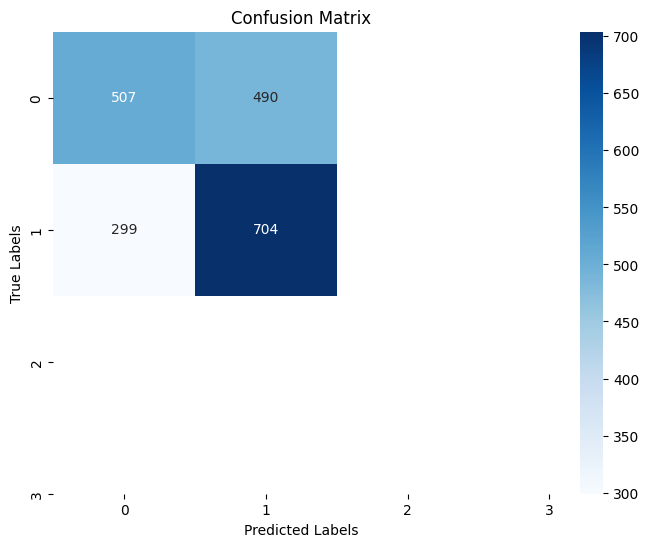

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Step 13: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#Using Preprocessing



In [22]:
# removing lemmatizing
import spacy
nlp = spacy.load("en_core_web_sm")

tokens = []
for doc in nlp.pipe(data['review'], batch_size=500, disable=['ner', 'parser'], n_process=-1):
    tokens.append([token.lemma_ for token in doc if not token.is_punct])

In [24]:
data['preprocessed_sentiment'] = pd.Series(tokens).apply(lambda x: " ".join(x))
data['preprocessed_sentiment'].head(5)

,preprocessed_sentiment
0,I first see jake gyllenhaal in jarhead a lit...
1,I enjoy the movie and the story immensely I ha...
2,I have a hard time sit through this every sing...
3,its hard to imagine that anyone could find thi...
4,this be one military drama I like a lot tom be...


In [25]:
#  Applying BOW using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(data.preprocessed_sentiment).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.3, random_state=42, stratify=data.label )


Accuracy: 63.47%
Confusion Matrix:
[[993 502]
 [594 911]]


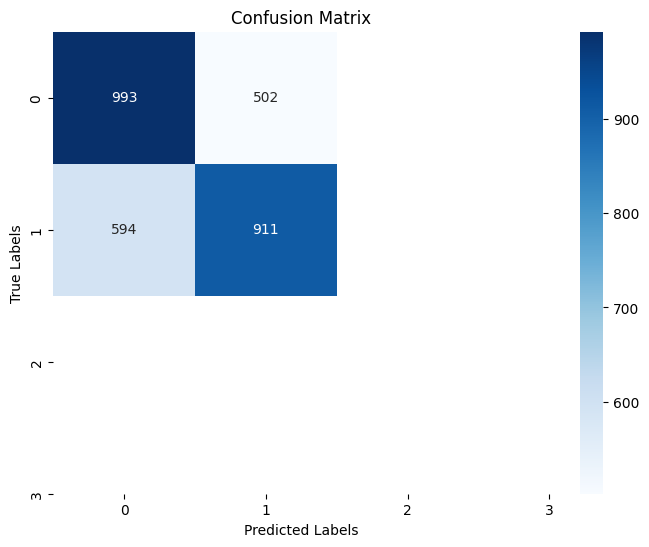

In [26]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()